<a href="https://colab.research.google.com/github/checodlg/gemma/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting at Chapter 3 of Deep Learning with Python Book

In [1]:
import tensorflow as tf

3.5.1 Constant tensors and variables

All-ones or all-zeros tensors

In [2]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Random tensors

In [4]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.827217  ]
 [ 0.79587185]
 [-0.14664201]], shape=(3, 1), dtype=float32)


In [5]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.41780138]
 [0.99822176]
 [0.16595197]], shape=(3, 1), dtype=float32)


Numpy arrays ARE assignable

In [6]:
import numpy as np
x = np.ones(shape=(2,2))
x[0, 0] = 0

print(x)

[[0. 1.]
 [1. 1.]]


TensorFlow tensors ARE NOT assignable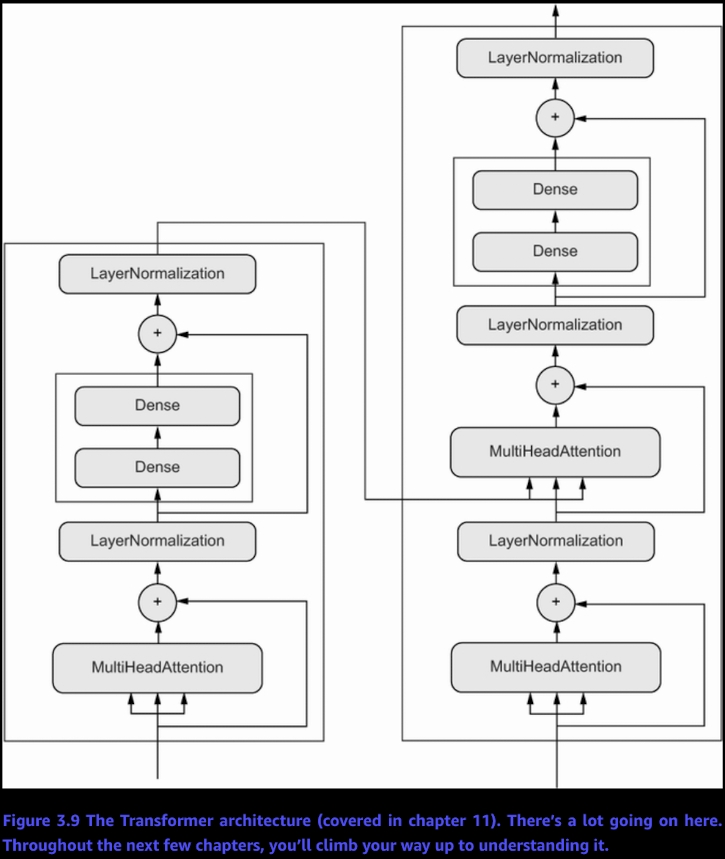

In [7]:
x = tf.ones(shape=(2,2))
x[0, 0] = 0

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

Creating a TensorFlow variable

To create a variable, you need to provide some initial value, such as a
random tensor.

In [8]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.0980707],
       [-0.8203564],
       [-1.896167 ]], dtype=float32)>


The state of the variable can be modified via its 'assign' method, as follows:

Assigning a value to a TensorFlow variable

In [9]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

It also works for a subset of the coefficients

Assigning a value to a subset of a TensorFlow variable

In [10]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Similarly, 'assign_add() and assign_sub()' are efficient equivalents of += and -=, as shown next

Using 'assign_add()'

In [11]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [12]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[5.],
       [3.],
       [3.]], dtype=float32)>

Tensor Operations: Doing math in TensforFlow

Just like NumPy, TensorFlow offers a large collection of tensor operations
to express mathematical formulas. Here are a few examples

A few basic math operations

In [13]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

# Take the square
# Take the square root
# Add two tensors (element-wise)
# take the product of two tensors (as discussed in CH2)
# Multiply two tensors (element-wise)

print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


A second look at the GradientTape API

So far, TensorFlow seems to look a lot like NumPy. But here's something NumPy can't do: retrieve the gradient of any differentiable expression with respect to any of its inputs. Just open a GradientTape scope, apply sdome computation to one or several input tensors, and retrieve the gradient of the result with respect to the inputs.

Using the GradientTape

In [14]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

This is most commonly used to retrieve the gradients of the loss of a model with respect to its weights: gradients=tape.gradient(loss, weights).
You saw this in action in chapter 2.

Using GradientTape with constant tensor inputs

In [15]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

Why is this necessary? Because it would be too expensive to preemptively store the information required to compute the gradient of anything with respect to anything. To avoid wasting resources, the tape needs to know what to watch. Trainable variables are watched by default because computing the gradient of a loss with regard to a list of trainable variables is the most common use of the gradient tape.

The gradient tape is a powerfule utility, even capable of computing second-order gradients, that is to say, the gradient of a gradient. For instance, the gradient of the position of an object with regard to time is the speed of that object, and the second-order gradient is its acceleration.

If you measure the position of a falling apple a long a vertical axis over time and find that it verifies 'position(time) = 4.9 * time ** 2', what is its acceleration? Let's use two nested gradient tapes to find out.

In [16]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed , time)

print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


An end-to-end example: A linear classifier in pure TensorFlow

In [17]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

Generate the first class of points: 1000 random 2D points with cov=[[1, 0.5],[0.5, 1]] corresponds to an oval-like point cloud oriented from bottom left to top right.

Generate the other class of points with a different mean and the same covariance matrix

In the preceding code, negative_samples and positive_samples are both arrays with shape (1000, 2). Let's stack them into a single array with shape (2000, 2)

Stacking the two classes into an array with shape (2000, 2)

In [18]:
import numpy as np

In [19]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

Let's generate the corresponding target labels, an array of zeros and ones of shape (2000, 1) where targets[i, 0] is 0 if inputs[i] belongs to class 0 (and inversely)

Generating the corresponding targets (0 and 1)

In [20]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

Plotting the two point classes

<function matplotlib.pyplot.show(close=None, block=None)>

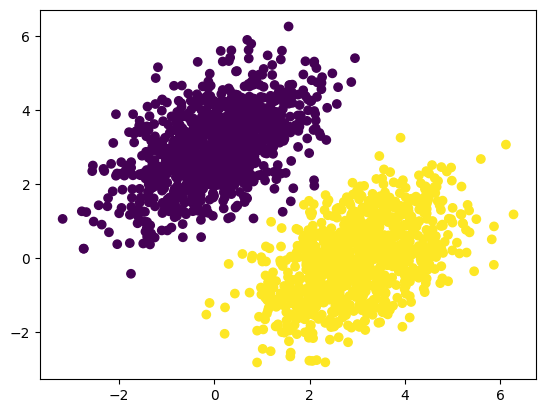

In [21]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show

Now let's create a linear classifier that can learn to seperate these two blobs. A linear classifier is an affine transformation (prediciton=W*input+b) trained to minimize the square of the difference between predictions and the targets.

As you'll see, it's actually a much simpler example than the end-to-end example of a toy two-layer neural network you saw at the end of chaper 2. However, this time you should be able to understand everything about the code, line by line.

Let's create our variables, W and b, initialized with random values and with zeros, respectively.

Creating the linear classifier variables

In [22]:
import tensorflow as tf

In [23]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

The inputs will be 2D points
The output predictions will be a single score per sample (close to 0 if the sample is predicted to be in class 0, and close to 1 if the sample is predicted to be in class 1).

Here's our forward pass function:

In [24]:
def model(inputs):
  return tf.matmul(inputs, W) + b

Because our linear classifier operates on 2D inputs, W is really just two scalar coefficients, w1 and w2: W = [[w1], [w2]]. Meanwhile, b is a single scalar coefficient. As such, for a given inpunt point [x, y] its prediction value is: prediction = [[w1], [w2]] * [x, y] + b=w1*xw2*y+b

The following listing shows our loss function

The mean squared error loss function:

In [25]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

per_sample_losses will be a tensor with the same shape as targets and predictions, comntaining per-sample loss scores.

We need to average these per-sample loss scores into a single scalar loss value: this is what reduce_mean does.

Next is the training step, which receives some training data and updates the weights W and b so as to minimize the loss on the data.

The training step function:

In [26]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:                                         # 1
    predicitions = model(inputs)                                           # 1
    loss = square_loss(targets, predicitions)                              # 1
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])          # 2
  W.assign_sub(grad_loss_wrt_W * learning_rate)                           # 3
  b.assign_sub(grad_loss_wrt_b * learning_rate)                           # 3
  return loss



1. Forward pass, inside a gradient tape scope
2. Retrieve the gradient of the loss with regard to weights
3. Update the weights




For simplicity, we’ll do batch training instead of mini-batch training: we’ll run each training step (gradient computation and weight update) for all the data, rather than iterate over the data in small batches. On one hand, this means that each training step will take much longer to run, since we’ll compute the forward pass and the gradients for 2,000 samples at once. On the other hand, each gradient update will be much more effective at reducing the loss on the training data, since it will encompass information from all training samples instead of, say, only 128 random samples. As a result, we will need many fewer steps of training, and we should use a larger learning rate than we would typically use for mini-batch training (we’ll use learning_rate = 0.1, defined in listing 3.20).

The batch training loop:

In [27]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.3627
Loss at step 1: 0.0837
Loss at step 2: 0.0781
Loss at step 3: 0.0734
Loss at step 4: 0.0692
Loss at step 5: 0.0653
Loss at step 6: 0.0618
Loss at step 7: 0.0586
Loss at step 8: 0.0557
Loss at step 9: 0.0530
Loss at step 10: 0.0506
Loss at step 11: 0.0484
Loss at step 12: 0.0464
Loss at step 13: 0.0445
Loss at step 14: 0.0428
Loss at step 15: 0.0413
Loss at step 16: 0.0399
Loss at step 17: 0.0386
Loss at step 18: 0.0374
Loss at step 19: 0.0364
Loss at step 20: 0.0354
Loss at step 21: 0.0345
Loss at step 22: 0.0337
Loss at step 23: 0.0330
Loss at step 24: 0.0323
Loss at step 25: 0.0317
Loss at step 26: 0.0311
Loss at step 27: 0.0306
Loss at step 28: 0.0301
Loss at step 29: 0.0297
Loss at step 30: 0.0293
Loss at step 31: 0.0290
Loss at step 32: 0.0286
Loss at step 33: 0.0283
Loss at step 34: 0.0281
Loss at step 35: 0.0278
Loss at step 36: 0.0276
Loss at step 37: 0.0274
Loss at step 38: 0.0272
Loss at step 39: 0.0270


After 40 steps, the training loss seems to have stablized around 0.025 Let's plot how our linear model classifies the training data points.

Because our targets are zeros and ones, a given input point will be classfied as "0" if its prediction value is below 0,5, and as "1" if it is above 0.5

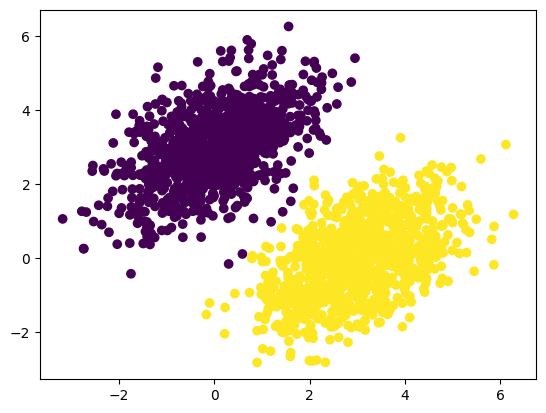

In [28]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

Our model's predictions on the training inputs: pretty similar to the training targets

Recall that the prediction value for a given point [x, y] is simply prediction == [[w1], [w2]] • [x, y] + b == w1 * x + w2 * y + b. Thus, class 0 is defined as w1 * x + w2 * y + b < 0.5, and class 1 is defined as w1 * x + w2 * y + b > 0.5. You’ll notice that what you’re looking at is really the equation of a line in the 2D plane: w1 * x + w2 * y + b = 0.5. Above the line is class 1, and below the line is class 0. You may be used to seeing line equations in the format y = a * x + b; in the same format, our line becomes y = - w1 / w2 * x + (0.5 - b) / w2.

Let's plot this line

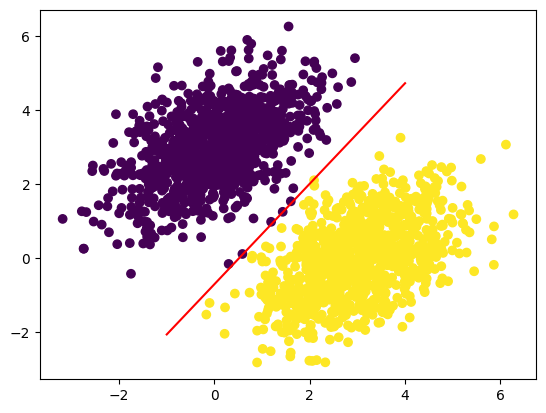

In [29]:
x = np.linspace(-1, 4, 100)                                           #1
y = - W[0] / W[1] * x + (0.5 - b) /W[1]                               #2
plt.plot(x, y, "-r")                                                  #3
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)    #4



1. Generate 100 regularly spaced numbers between -1 and 4, which we will use to plot our line
2. This ir our line's equation
3. Plot our line ("-r" means "plot as a red line")
4. Plot our model's predictions on the same plot

this is really what a linear classifier is all about: findin the parameters of a line (or, in higher-dimensional spaces, a hyperplane) neatly separating two classes of data.



# **Anatomy of a neural network: Understanding core Keras APIs**

At this point, you know the basics of TensorFlow, and you can use it to implement a toy model form scratch, such as the batch linear classifier in the previous section, or the toy neural network at the end of chapter 2. That's a solid foundation to build upon. It's now time to move on to a more productive, more robust path to deep learning: the Keras API

Layers: The buiilding blocks of deep learning

The fundamental data structure in neural networks is the layer, to which you were introduced in chapter 2. A layer is a data processing module that takes as input one or more tensors and that outputs one or more tensors. Some layers are stateless, but more frequently layers have a state: the layer's weights, one or several tensors learned with stochastic gradient descent, which together contain the network's knowledge.

Different types of layers are appropriate for different tensor formats and different types of data processing. For instance simple vector data, stored in rank-2 tensors of shape (samples, features), is often processed by densely connected layers, also called fully connected or dense layers (the Dense class in Keras). Sequence data, stored in rank-3 tensors of shape (samples, timesteps, features), is typically processed by recurrent layers, such as an LSTM layer, or 1D convolution layers (Conv1D). Image data, stored in rank-4 tensors, is ususally processed by 2D convolution layers (Conv2D).

You can think of layers as the LEGO bricks of deep learning, a metaphor that is made explicit by Keras. Builiding deep learning models in Keras is done by clipping together compatible layers to form useful data-transformation pipelines.

# **The Base Layer Class in Keras**

A simple API should have in a single abstraction around which everything is ceneterd. In Keras, that's the Layer class. Everything in Keras is either a Layer or something that closely interacts with a Layer.

A Layer is an object that encapsulates some state (weights) and some computation (a forward pass). The weights are typically defined in a 'build()' (although they could also be created in the constructor, __init__()), and the computation is defined in the call() method.

In the previous chapter, we implemented a NaiveDense class that contained two weights W and b and applied the computation output=activation(dot(input, W) + b). This is what the same layer would look like in Keras.

A Dense Layer implemented as a Layer subclass:

In [30]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):                               #1
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):                                      #2
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units),          #3
                             initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,),
                             initializer="zeros")

  def call(self, inputs):                                            #4
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

1. All Keras layers inherit from the base Layer class
2. Weight creation takes place in the build() method
3. add_weight() is a shortcut method for creating weights. It is also possible to create standalone variables and assign them as layer attributes,
like self.W = tf.Variable(tf.random.uniform(w_shape))
4. We define the forward pass computation in the call() method


In the next section, we'll cover in detail the prupose of these build() and call() methods. Don't worry if you don't understand everything just yet.

Once instansiated, a layer like this can be used just like a function, taking as input a TensorFlow tensor:

In [31]:
import tensorflow as tf

In [32]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)                  #1
input_tensor = tf.ones(shape=(2, 784))                                   #2
output_tensor = my_dense(input_tensor)                                   #3
print(output_tensor.shape)

(2, 32)


1. Instantiate our layer, defined previously
2. Create some test inputs
3. Call the layer on the inputs, just like a function

You're probably wondering, why did we have to implement call() and build(), since we ended up using our layer by plainly calling it, that is to say, by using its __call__() method? It's because we want to be able to create the state just in time. Let's see how that works.

# **Automatic Shape Inference: Building Layers on the fly**

Just like with LEGO bricks, you can only "clip" together layers that are compatible. The notion of *layer compatibility * here refers to the fact that every layer will only accept input tensors of a certain shape and will return output tensors of a certain shape. Consider the following example:

In [33]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")   #1

1. A Dense layer with 32 output units

This layer will return a tensor where the first dimenasion has been transformed to be 32. It can only be connecto to a downstream layer that expectes 32-dimensional vectors as input.

When using Keras, you don't have to worry about size compatibility most of the time, because the layers you add to your models are dynamically built to match the shape of the incoming layer. For instance, suppose you write the following:

In [34]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

The layers didn't receive any information about the shape of their inputs-instead, they automatically inferred their input shape as being the shape of the first inputs they see.

In the toy version of the Dense layer we implemented in chapter 2 (which we named NaiveDense), we had to pass the layer's input size explicitly to the constructor in order to be able to create its weights. That's not ideal. because it would lead to models that look like this, where each new layer need to be made away of the shape of the layer before it:

In [35]:
model = NaiveSequential([
    NaiveDense(input_size=784, output_size=32, activation="relu"),
    NaiveDense(input_size=32, output_size=64, activation="relu"),
    NaiveDense(input_size=64, output_size=32, activation="relu"),
    NaiveDense(input_size=32, output_size=10, activation="softmax")
])

NameError: name 'NaiveSequential' is not defined

It would be even worse if the rules used by a layer to produce its output shape are complex. For instance, what if our layer returned outputs of shape (batch, input_ size * 2 if input_size % 2 == 0 else input_size * 3)?

If we were to reimplement our NaiveDense layer as a Keras layer capable of automatic shape inference, it would look like the previous SimpleDense Llayer with its build() and call() methods.

In SimpleDense, we no longer create weights in the constructor like in the NaiveDense example; instead, we create them in a dedicated state-creation method, build(), which receives as an argument the first input shape seen ny the layer. The build() method is called automatically the first time the layer is called (via its __call__() method). In fact, that's why we defined the computation in a separate call() method rather than in the __call__() method directly. The __call__() method of the base layer schematically looks like this:

In [36]:
def __call__(self, inputs):
  if not self.built:
    self.build(inputs.shape)
    self.built = True
  return self.call(inputs)

With automatic shape inference, our previous example becomes simple and neat:

In [37]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

Note that automatic shape inference is not the only thing that the Layer class's __call__() method handles. It takes care of many more things, in particualr routing between *eager* and *graph* execution (a concept you'll learn about in chapter 7), and input masking (which we'll cover in chapter 11). For now, just remember: when implementing your own layers, put the forward pass in the call() method.

# **From layers to models**

A deep larning model is a graph of layers. In Keras, that's the Model class. Until now, you've only seen Sequential models (a subclass of Model), which are simple stacks of layers, mapping a single input to a single output. But as you move forward, you'll be exposed to a much borader variety of network toplogies.
These are some common ones:


*   Two-branch networks
*   Multhiead networks
*   Residual connections

Network topology can get quite involved. For instance, figure 3.9 shows the topology of the graph of layers of a Transformer, a common architecture designed to process text data.


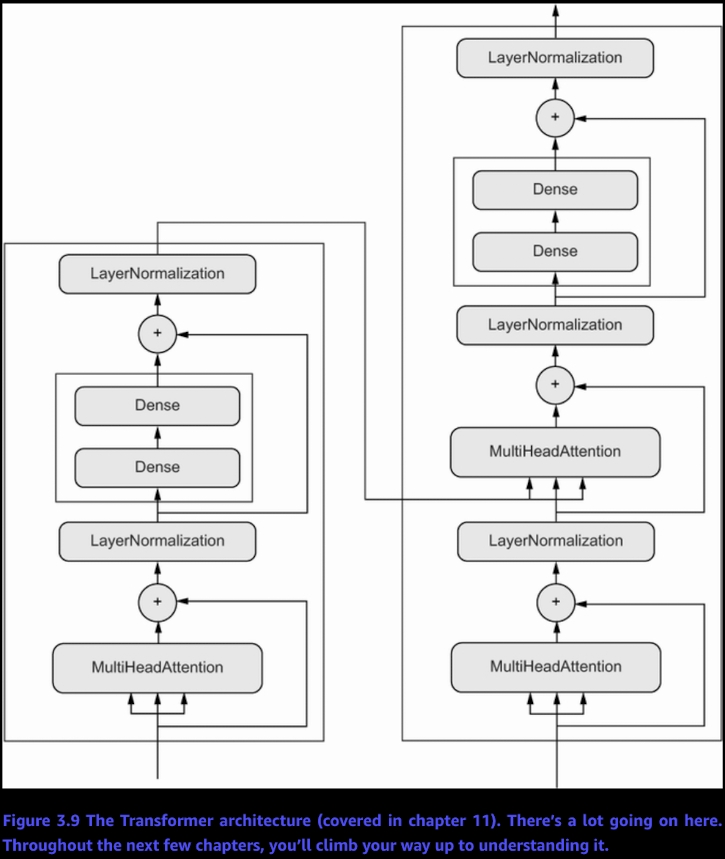

There are generallly two ways of building such models in Keras: you could directly subclass the Model class, or you could use the Functional API, which lets you do more with less code. We'll cover both approaches in chapter 7.

The topology of a model defines a hypothesis space. You may remember that in chapter 1 we described machine learning as searching for useful representations of some input data, within a predefined space of possibilities, using guidance from a feedback signal. By choosing a network topology, you constrain your space of possibilities (hypothesis space) to a specific series of tensor operations, mapping input data to output data. What you’ll then be searching for is a good set of values for the weight tensors involved in these tensor operations.

To learn from data, you have to make assumptions about it. These assumptions define what can be learned. As such, the structure of your hypothesis space—the architecture of your model—is extremely important. It encodes the assumptions you make about your problem, the prior knowledge that the model starts with. For instance, if you’re working on a two-class classification problem with a model made of a single Dense layer with no activation (a pure affine transformation), you are assuming that your two classes are linearly separable.

Picking the right network architecture is more an art than a science, and although there are some best practices and principles you can rely on, only practice can help you become a proper neural-network architect. The next few chapters will both teach you explicit principles for building neural networks and help you develop intuition as to what works or doesn’t work for specific problems. You’ll build a solid intuition about what type of model architectures work for different kinds of problems, how to build these networks in practice, how to pick the right learning configuration, and how to tweak a model until it yields the results you want to see.

# **The "compile" step: Configuring the learning process**

Once the model architecture is defined, you still have to choose three more things:

* Loss function(objective function)--The quanitity that will be minimized during training. It represents a measure of success for the task at hand.
* Optimizer--Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent(SGD).
* Metrics--The measures of success you want to monitor during training and validation, such as classification accuracy. Unlike the loss, the training wil not optimize directly for these metrics. As such, metrics don't need to be differentiable.



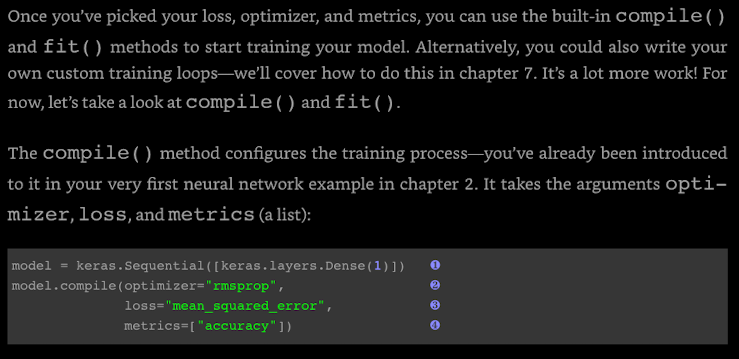



1.   Define a linear classifier
2.   Specify the optimizer by name: RMSprop (it's case sensitive)
3.   Specify the loss by name: mean squared error
4.   Specify a list of metrics: in this case, only accurracy

In the preceding call to compile(), we passed the optimizer, loss, and metrics as strings (such as "rmsprop"). These strings are actually shortcuts that get converted to Python objects. For instance, "rmsprop" becomes keras.optimizers.RMSprop(). Importantly, it's also possible to specify these argmuments as object instances, like this:

model.compile(optimizer=keras.optimiziers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccurracy()])

This is useful if you want to pass your own custom losses or metrics, or if you want to futher configure the objects you're using--for instance, by passing a learning_rate argument to the optimizer:

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              loss=my_custom_loss,
              metrics=[my_custom_metric_1, my_custom_metric_2])

In chapter 7, we'll cover how to create custom losses and metrics. In general, you won't have to create your own losses, metrics, or optimizers from scratch, because Keras offers a wide range of built-in options that is likely to include what you need:

Optimizers:
* SGD(with or without momentum)
* RMSprop
* Adam
* Adagrad
* Etc.

Losses:
* CategoricalCrossEntropy
* SparseCategoricalCrossEntropy
* BinaryCrossentropy
* MeanSquaredError
* KLDivergence
* CosineSimilarity
* Etc.

Metrics:
* CategoricalAccuracy
* SparseCategoricalAccuracy
* BinaryAccuracy
* AUC
* Precision
* Recall
* Etc.

Throughout this book, you'll see concrete applications of many of these options.




# *Picking a loss function*

Choosing the right loss function for the right problem is extremely important: your network will take any shortcut it can to minimize the loss, so if the objective doesn't fully correlate with success for the task at hand, your network will end up doing things you may not have wanted. Imagine a stupid, omnipotent AI trained via SDG with this poorly chosen objective function:
"maximizing the avergae well-being of all humans alive." To make its job easier, this AI might choose to kill all humans except a few and focus on the well-being of the remaining ones—because average well-being isn’t affected by how many humans are left. That might not be what you intended! Just remember that all neural networks you build will be just as ruthless in lowering their loss function—so choose the objective wisely, or you’ll have to face unintended side effects.
Fortunately, when it comes to common problems such as classification, regression, and sequence prediction, there are simple guidelines you can follow to choose the correct loss. For instance, you’ll use binary crossentropy for a two-class classification problem, categorical crossentropy for a many-class classification problem, and so on. Only when you’re working on truly new research problems will you have to develop your own loss functions. In the next few chapters, we’ll detail explicitly which loss functions to choose for a wide range of common tasks.

# *Understanding the fit() method*

After compile() comes fit(). The fit() method implements the training loop itself.
These are its key arguments:

* The data (inputs and targets) to train on. It will typically be passed either in the form of NumPy arrays or a TensorFlow Dataset object. You'll learn more about the Dataset API in the next chapters.
* The number of *epochs* to train for: how many times the training loop should iterate over the the data passed.
* The batch size to use within each epoch of mini-batch gradient descent: the number of training examples considered to compute the gradients for one weight update step.

# *Calling fit() with NumPy data*

history = model.fit(
  inputs,                     #1
  targets,                    #2
  epochs=5,                   #3
  batch_size=128              #4
)

1. The input examples, as a NumPy array
2. The corresponding training targets, as a NumPy array
3. The training loop will iterate over the data 5 times.
4. The training loop will iterate over the data in batches of 128 examples

The call to fit() returns a *History* object. This object contains a *history* field, which is a dict mapping keys such as "loss" or specific metric names to the list of their per-epoch values.

>>> history.history
{"binary_accuracy": [0.855, 0.9565, 0.9555, 0.95, 0.951],
"loss": [0.6573270302042366,
          0.07434618508815766,
          0.07687718723714351,
          0.07412414988875389,
          0.07617757616937161]}

# **Monitoring loss and metrics on validation data**

The goal of machine learning is not to obtain models that perform well on the training data, which is easy—all you have to do is follow the gradient. The goal is to obtain models that perform well in general, and particularly on data points that the model has never encountered before. Just because a model performs well on its training data doesn’t mean it will perform well on data it has never seen! For instance, it’s possible that your model could end up merely memorizing a mapping between your training samples and their targets, which would be useless for the task of predicting targets for data the model has never seen before. We’ll go over this point in much more detail in chapter 5.

To keep an eye on how the model does on new data, it’s standard practice to reserve a subset of the training data as validation data: you won’t be training the model on this data, but you will use it to compute a loss value and metrics value. You do this by using the validation_data argument in fit(). Like the training data, the validation data could be passed as NumPy arrays or as a TensorFlow Dataset object.

#**Using the validation_data argument**

model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))           #1
shuffled_inputs = inputs[indices_permutation]                      #1
shuffled_targets = targets[indices_permutation]                    #1

num_validation_samples = int(0.3 * len(inputs))                    #2
val_inputs = shuffled_inputs[:num_validation_samples]              #2
val_targets = shuffled_targets[:num_validation_samples]            #2
training_inputs = shuffled_inputs[num_validation_samples:]         #2
training_targets = shuffled_targets[num_validation_samples:]       #2
model.fit(
  training_inputs,                                                 #3
  training_targets,                                                #3
  epochs=5,
  batch_size=16,
  validation_data=(val_inputs, val_targets)                        #4
)

1. To avoid having samples from only one class in the validation data, shuffle the inputs and targets using a random indices permutation.
2. Reserve 30% of the training inputs and targets for validation (we’ll exclude these samples from training and reserve them to compute the validation loss and metrics).
3. Training data, used to update the weights of the model
4. Validation data, used only to monitor the validation loss and metrics

The value of the loss on the validation data is called the "validation loss," to distinguish it from the "training loss." Note that it's essential to keep the training data and validation data strictly separate: the prupose of validation is to monitor whether what the model is learning is actually useful on new data. If any of the validation datahas been seen by the model during training, your validation loss and metrics will be flawed.

Note that if you want to compute the validation loss and metrics after the training is complete, you can call the evaluate() method:

loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

evaluate() will iterate in batches (of size batch_size) over the data passed and return a list of scalars, where the first entry is the validation loss and the following entries are the validation metrics. If the model has no metrics, only the validation loss is returned (rather than a list).

# **Inference: Using a model after training**

Once you've trained your model, you're going to want to use it to make predctions on new data. This is called *inference*. To do this, a naive approach would simply be to __call__() the model:

predictions = model(new_inputs)  #1

1. Takes a NumPy array of TensorFlow tensor and returns a TensorFlow tensor

Hoever, this will process all inputs in new_inputs at once, which may not be feasible if you're looking at a lot of data (in particular, it may require more memory than your GPU has).

A better way to do inference is to use the predict() method. It will iterate over the data in small batches and return a NumPy array of predictions. And unlike __call__(), it can also process TensorFlow Dataset objects.

predictions = model.predict(new_inputs, batch_size=128)  #1

1. Takes a NumPy array or a Dataset and returns a NumPy array

For instance, if we use predict() on some of our validation data with the linear model we trained earlier, we get scalar score that correspond to the model's prediction for each input sample:

>>> predictions = model.predict(val_inputs, batch_size-128)
>>> print(predictions[:10])
[[0.3590725 ]
 [0.82706255]
 [0.74428225]
 [0.682058  ]
 [0.7312616 ]
 [0.6059811 ]
 [0.78046083]
 [0.025846  ]
 [0.16594526]
 [0.72068727]]

 For now, this is all you need to know about Keras models. You are ready to move on to solving real-world machine learning problems with Keras in the next chapter.

 <!-- Check Book for Summary on CH4 -->